In [134]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

In [136]:
df=pd.read_csv('../input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [137]:
df["quality"].value_counts()  #it counts the number of times the specific wine quality is there is dataset

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [138]:
df.columns = df.columns.str.replace(' ','_') # It will take it change the column into the string and replace all the spaces with  underscore 

In [139]:
df.head(1)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [140]:
df.columns[df.isna().any()]  #check if there is any NA value in the column and return if any NA value is there

Index([], dtype='object')

plotting

<Axes: xlabel='quality', ylabel='citric_acid'>

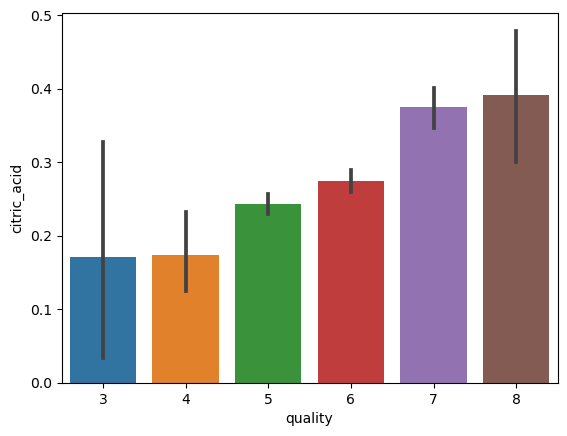

In [141]:
sns.barplot(x='quality',y='citric_acid',data=df)

<Axes: xlabel='quality', ylabel='chlorides'>

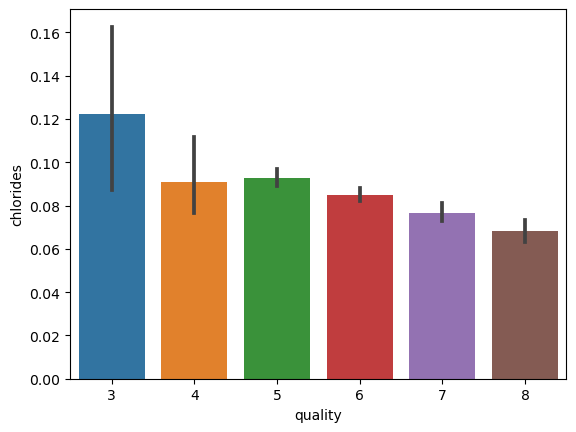

In [142]:
sns.barplot(x='quality',y='chlorides',data=df)

<Axes: xlabel='quality', ylabel='residual_sugar'>

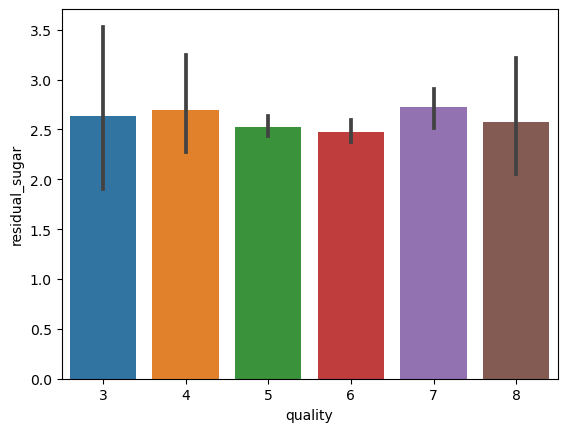

In [143]:
sns.barplot(x='quality',y='residual_sugar',data=df) #we can observe that the lesser variation in the residual sugar at 5 and 6 quality 

<Axes: xlabel='citric_acid', ylabel='fixed_acidity'>

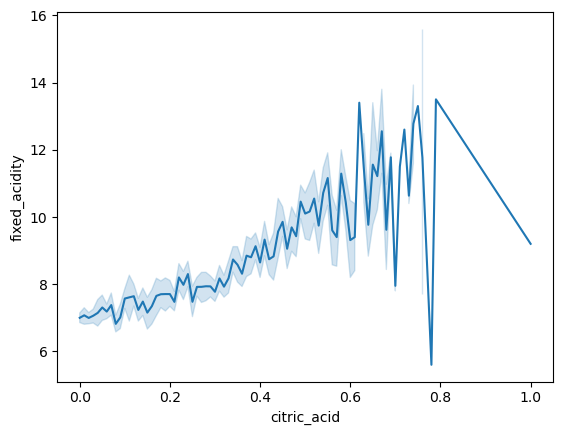

In [144]:
sns.lineplot(x='citric_acid',y='fixed_acidity',data=df) #with increase in citric acid fixed acidity will be increasing

In [145]:
def qualityupdate(df):
    for i, row in df.iterrows():   
        val = row ['quality']
        if val <=6:
            df.at[i,'quality']=0
        else:
            df.at[i,'quality']=1
qualityupdate(df)

The function qualityupdate takes a DataFrame df as an argument.
It iterates over each row in the DataFrame using the iterrows() method.
For each row, it extracts the value of the 'quality' column into the variable val.
It then checks if the value val

#iterrows function will traverse throughout the dataset and return two values i.e i will denote particular row and row will denote the whole row 

In [146]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


**train test split**

In [147]:
from sklearn.model_selection import train_test_split


In [148]:
x=df.drop(['quality'],axis=1)  #The axis=1 parameter indicates that the operation should be performed along columns 
y=df['quality']


In [149]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)


random_state parameter is an optional parameter, and if provided with an integer value, it ensures that the random shuffling of data and the division into training and testing sets will be performed in a reproducible way.If you omit this parameter or set it to None, the train-test split will be different every time you run the code.random_state=42 ensures that the train-test split will be consistent across different runs of the code with the same dataset.

In [150]:
from sklearn.preprocessing import StandardScaler


StandardScalar transforms the data such that each feature has a mean of 0 and a standard deviation of 1.
it  ensure that each feature contributes equally to the learning process and prevents features with larger scales from dominating the model.

In [151]:
sc = StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.fit_transform(xtest)

The fit method of StandardScaler calculates the mean and standard deviation of each feature from the training data and stores them in the scaler object. The transform method then applies the scaling to the training and testing data using the computed mean and standard deviation.

# SVM

In [152]:
from sklearn.svm import SVC

SVC (Support Vector Classification): This class is used for classification tasks.

SVR (Support Vector Regression): This class is used for regression tasks

In [153]:
reg = SVC()  #reg is name of model
#Create an instance of SVC called reg. By default, it uses a radial basis function (RBF) kernel for non-linear classification, 

#fit the SVC classifier on the scaled training data and make predictions on the scaled testing data
fit (train) the SVM classifier on the training data (xtrain, ytrain) using the fit method.

In [154]:
reg.fit(xtrain,ytrain)

SVC()

In [155]:
reg.score(xtest,ytest)

0.875

In [156]:
yp =reg.predict(xtest)

use the trained model to predict the target values for the test data (xtest) using the predict method, and the predicted values are stored in the variable yp.

In [157]:
from sklearn.metrics import confusion_matrix

confusion matrix, which is a table that is often used to evaluate the performance of a classification model.
            Predicted Positive   Predicted Negative
Actual Positive      TP                   FN
Actual Negative      FP                   TN

True Positives (TP): These are the cases where the model predicted a positive class, and the true label was also positive.

True Negatives (TN): These are the cases where the model predicted a negative class, and the true label was also negative.

False Positives (FP): Also known as Type I errors, these are the cases where the model predicted a positive class, but the true label was actually negative.

False Negatives (FN): Also known as Type II errors, these are the cases where the model predicted a negative class, but the true label was actually positive.

In [158]:
#             Predicted Positive   Predicted Negative
# Actual Positive      TP                   FN
# Actual Negative      FP                   TN


In [159]:
c=confusion_matrix(ytest,yp)

In [160]:
c

array([[268,   5],
       [ 35,  12]])

<Axes: >

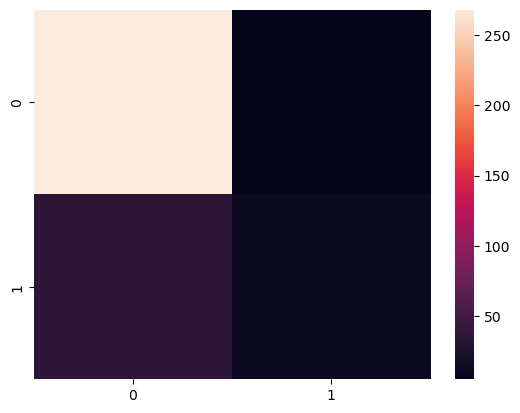

In [161]:
sns.heatmap(c)

In [162]:
from sklearn.model_selection import GridSearchCV

GridSearchCV is a powerful tool in scikit-learn (sklearn) for hyperparameter tuning in machine learning models. It is used to systematically search for the best combination of hyperparameters for a given model by evaluating the model's performance on a specific metric using cross-validation.

In [168]:
model = GridSearchCV(reg,{
    'C':[0.1,0.4,0.8,1.0,1.3],
    'gamma':[0.1,0.4,0.8,1.0,1.3],
    'kernel':['rbf','linear']
},scoring='accuracy',cv=10) 

model

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.4, 0.8, 1.0, 1.3],
                         'gamma': [0.1, 0.4, 0.8, 1.0, 1.3],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy')

hyperparameter grid:
Create a dictionary where the keys are the hyperparameter names, and the values are lists of hyperparameter values you want to try.
cv is the number of cross-validation folds (e.g., 10 for 10-fold cross-validation), and scoring is the metric you want to optimize (e.g., 'accuracy' for classification tasks).

In [165]:
model.fit(xtrain,ytrain)  #we are trying to fit our data inside it

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.4, 0.8, 1.0, 1.3],
                         'gamma': [0.1, 0.4, 0.8, 1.0, 1.3],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy')

In [166]:
model.best_params_ #best_params contain the best combination of hyperparameters

{'C': 1.3, 'gamma': 1.0, 'kernel': 'rbf'}

In [174]:
mod=SVC(C=1.3, gamma=1.0, kernel='rbf') 
#best_model will contain the model instance with those hyperparameters.

In [177]:
mod.fit(xtrain,ytrain)

SVC(C=1.3, gamma=1.0)

In [178]:
mod.score(xtest,ytest)

0.896875

# Random Forest Classifier

In [183]:
from sklearn.ensemble import RandomForestClassifier

In [185]:
rfc = RandomForestClassifier(n_estimators=200)

RandomForestClassifier is an ensemble learning method based on decision trees. It constructs multiple decision trees during training and combines their predictions to make a final decision. This aggregation of multiple decision trees improves the overall performance and robustness of the model.

n_estimators is one of the hyperparameters of the RandomForestClassifier class. It represents the number of decision trees to be used in the random forest. Setting n_estimators=200 means that the random forest will consist of 200 decision trees.

In [186]:
rfc.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=200)

In [187]:
rfc.score(xtest,ytest)

0.8875

In [188]:
from sklearn.model_selection import cross_val_score

The cross_val_score function is a useful tool for performing cross-validation to estimate the performance of a model on unseen data. It automates the process of splitting the data, training the model, and evaluating the model on each fold of the cross-validation.

In [189]:
rfc2 = cross_val_score(estimator=rfc,X=xtrain,y=ytrain,cv=10)

cross_val_score splits the data X and y into 9 folds (since cv=10), trains theRandomForestClassifier model (rfc) on 9 folds, and evaluates the model on the remaining fold. This process is repeated 10 times, with each fold serving as the test set exactly once.
The X parameter is your feature matrix (xtrain), and the y parameter is your target vector (ytrain).
The result of cross_val_score is stored in the rfc2 variable, which will be an array containing the accuracy scores for each of the 10 folds.

In [190]:
rfc2.mean()


0.910894438976378

it calculates the mean of the accuracy scores obtained from the cross_val_score function. Since cross_val_score returns an array of accuracy scores for each fold in cross-validation, taking the mean will give you an estimate of the average accuracy of the RandomForestClassifier model across all the folds.

# prediction

In [191]:
a = [[6.0,0.3,0.1,2.4,0.002,10.0,33.0,0.99,4.5,0.55,12.0]]

we have to give 2d array input as, 2D array denotes the column, if we give 1D array it will indicate the row but we have to input column

In [192]:
mod.predict(a)

array([0])

array  0 indicate bad quality wine but array 1 wil indicate the good quality wine